In [5]:
import pandas as pd
df=pd.read_csv('new_york_temperature.csv')
df.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [6]:
#Code To Check "Is Tempearture a Random Walk"

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df.set_index('DATE',inplace=True)
df.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


In [7]:
df.index=pd.to_datetime(df.index,format='%Y')
df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


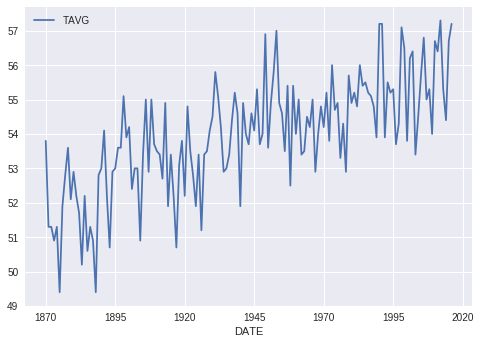

In [8]:
df.plot()
plt.show()

In [9]:
#Applying Dicky Fuller Test to test whether the temperature is Random walk or not

result=adfuller(df['TAVG'])
print("The P Value for the ADF test is : ",result[1])

The P Value for the ADF test is :  0.5832938987871152


***The P value for the ADF test is 0.58 which is greater than 0.5. Therefore, Temperature is a Random Walk.***

In [10]:
#Making the temperature stationary.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
temp_change=df.diff()
temp_change.head()

,TAVG
DATE,
1870-01-01,NaN
1871-01-01,-2.5
1872-01-01,0.0
1873-01-01,-0.4
1874-01-01,0.4


In [0]:
#Dropping the first row

temp_change=temp_change.dropna()

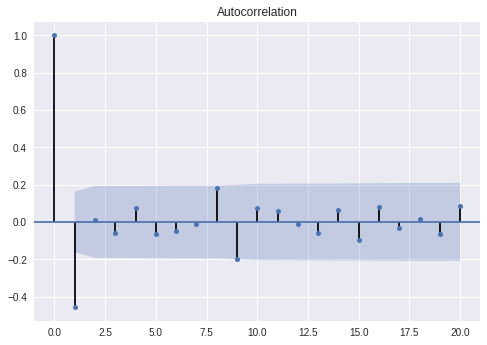

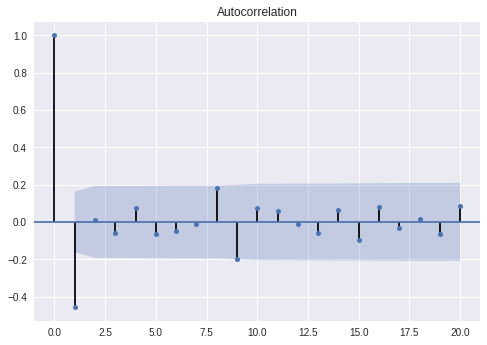

In [12]:
#Plotting the Autocorrelation Function

plot_acf(temp_change,lags=20)

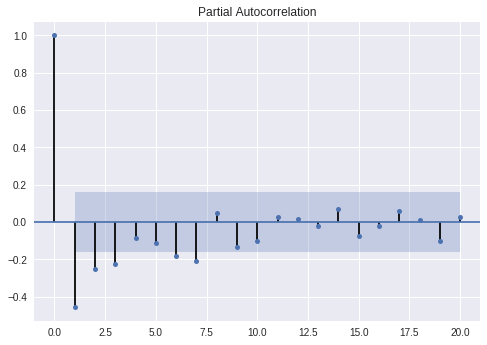

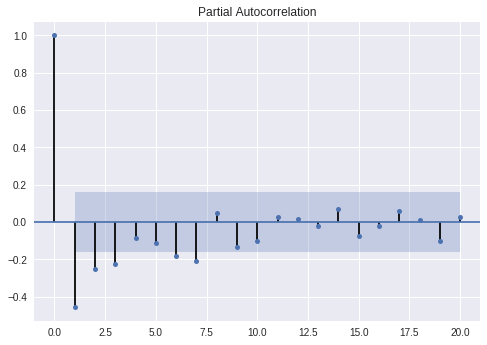

In [13]:
#Plotting the Partial Autocorrelation Function

plot_pacf(temp_change,lags=20)

In [14]:
#Finding which ARMA Model is best
#AR(1) Model


from statsmodels.tsa.arima_model import ARMA
mod=ARMA(temp_change,order=(1,0))
res=mod.fit()
print("The AIC for AR(1) is : ", res.aic)

The AIC for AR(1) is :  510.534689831391


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [15]:
#AR(2) Model 

mod1=ARMA(temp_change,order=(2,0))
res1=mod1.fit()
print("The AIC for AR(2) is : ",res1.aic)

The AIC for AR(2) is :  501.9274123160227


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [16]:
#MA(1) Model

mod2=ARMA(temp_change, order=(0,1))
res2=mod2.fit()
print("The AIC for MA(1) is : ",res2.aic)

The AIC for MA(1) is :  469.3909708062573


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [18]:
#ARMA(1,1) Model

mod3=ARMA(temp_change,order=(1,1))
res3=mod3.fit()
print("The AIC for ARMA(1,1) is : ",res3.aic)

The AIC for ARMA(1,1) is :  469.0729114901751


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


**The MA(1) and ARMA(1,1) have the two lowest AIC values.**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


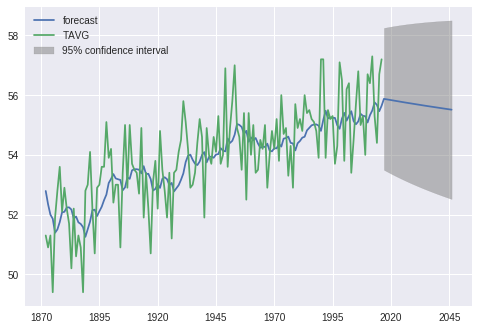

In [25]:
#We will be using ARMA(1,1) model to forecast temperature 

mod4=ARMA(df,order=(1,1,1))
res4=mod4.fit()
res4.plot_predict(start='1872-01-01',end='2046-01-01')
plt.show()

In [26]:
y_pred=res4.predict(start='1872-01-01',end='2046-01-01')
y_pred

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1872-01-01    52.790150
1873-01-01    52.344585
1874-01-01    51.996791
1875-01-01    51.859789
1876-01-01    51.391904
1877-01-01    51.502877
1878-01-01    51.746543
1879-01-01    52.074977
1880-01-01    52.092162
1881-01-01    52.236181
1882-01-01    52.242297
1883-01-01    52.167899
1884-01-01    51.869003
1885-01-01    51.935664
1886-01-01    51.739848
1887-01-01    51.686297
1888-01-01    51.578967
1889-01-01    51.254639
1890-01-01    51.515081
1891-01-01    51.764126
1892-01-01    52.144268
1893-01-01    52.165540
1894-01-01    51.949113
1895-01-01    52.111523
1896-01-01    52.263031
1897-01-01    52.483479
1898-01-01    52.667949
1899-01-01    53.056470
1900-01-01    53.194277
1901-01-01    53.356428
                ...    
2017-01-01    55.875146
2018-01-01    55.861396
2019-01-01    55.847743
2020-01-01    55.834187
2021-01-01    55.820726
2022-01-01    55.807360
2023-01-01    55.794089
2024-01-01    55.780911
2025-01-01    55.767826
2026-01-01    55.754833
2027-01-01    55